In [304]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [305]:
data=pd.read_csv('Churn_Modelling.csv', on_bad_lines='skip')

In [306]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [307]:
data.shape

(10000, 14)

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [309]:
#check null values
data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [310]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [311]:
#drop irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [312]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [313]:
data=pd.get_dummies(data, drop_first=True).astype(int)

In [314]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [315]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


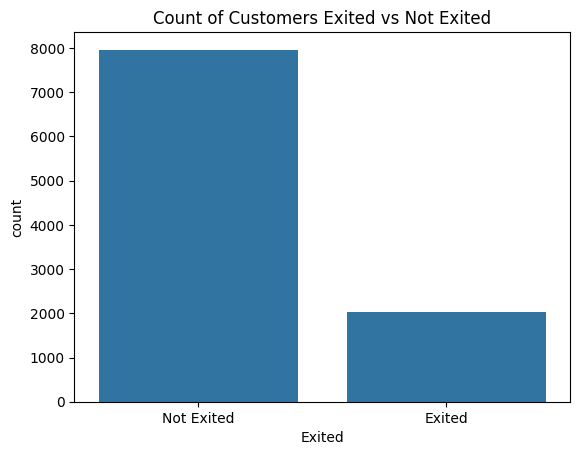

In [316]:
import seaborn as sns
sns.countplot(x='Exited', data=data)
plt.title('Count of Customers Exited vs Not Exited')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()

In [317]:
#dependent and independent feature
x=data.drop(['Exited'], axis=1)
y=data['Exited']

In [318]:
#balancing the imbalanced data
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()

,count
Exited,
1,7963
0,7963


In [319]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_res,y_res, test_size=0.2, random_state=0)

In [320]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [321]:
x_train

array([[ 0.0972674 , -0.10183088,  0.43751529, ..., -0.5756584 ,
        -0.46037838, -0.84238243],
       [ 0.03182662, -1.50196618,  0.06840432, ...,  1.73714134,
        -0.46037838,  1.18710928],
       [-1.1679211 ,  0.79825611,  0.43751529, ..., -0.5756584 ,
        -0.46037838, -0.84238243],
       ...,
       [-0.63348803, -0.30185021,  1.54484819, ..., -0.5756584 ,
         2.17212634, -0.84238243],
       [ 0.28268296,  1.99837208, -0.66981762, ..., -0.5756584 ,
        -0.46037838, -0.84238243],
       [-0.27356371,  0.69824644, -1.40803956, ...,  1.73714134,
        -0.46037838, -0.84238243]])

#ML algorithms

#1.LogisticRegression

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score

In [323]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [324]:
y_pred=lr.predict(x_test)

In [325]:
accuracy_score(y_test, y_pred)

0.7815442561205274

In [326]:
precision_score(y_test, y_pred)

0.7757352941176471

In [327]:
recall_score(y_test, y_pred)

0.793233082706767

In [328]:
f1_score(y_test, y_pred)

0.7843866171003717

#2.SVM

In [329]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train, y_train)

SVC()

In [330]:
y_pred2=sv.predict(x_test)
accuracy_score(y_test, y_pred2)

0.8305084745762712

In [331]:
precision_score(y_test, y_pred2)

0.83

#3.KNeighborsClassifier

In [332]:
from sklearn.neighbors  import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [333]:
y_pred3=kn.predict(x_test)
accuracy_score(y_test, y_pred3)

0.8129315756434401

In [334]:
precision_score(y_test, y_pred3)

0.7979737783075089

#4.DecisionTreeClassifier

In [335]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [336]:
y_pred4=dt.predict(x_test)
accuracy_score(y_test, y_pred4)

0.7922159447583177

In [337]:
precision_score(y_test, y_pred4)

0.7865030674846626

#5.RandomForestClassifier

In [338]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [339]:
y_pred5=rf.predict(x_test)
accuracy_score(y_test, y_pred5)

0.8534212178279975

In [340]:
precision_score(y_test, y_pred5)

0.855254877281309

#6.GradientBoostingClassifier

In [341]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [342]:
y_pred6=gb.predict(x_test)
accuracy_score(y_test, y_pred6)

0.8333333333333334

In [343]:
precision_score(y_test, y_pred6)

0.8372387587080431

In [344]:
best_model=pd.DataFrame({'models':['LR','SVC','KN','DT','RF','GBC'],'Acc':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [345]:
best_model

,models,Acc
0,LR,0.781544
1,SVC,0.830508
2,KN,0.812932
3,DT,0.792216
4,RF,0.853421
5,GBC,0.833333


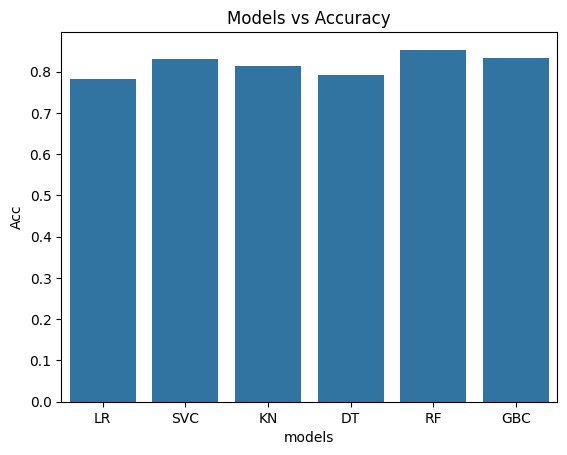

In [346]:
sns.barplot(x='models', y='Acc', data=best_model)
plt.title('Models vs Accuracy')
plt.show()

In [347]:
# bestModel= RandomForest

In [348]:
#saving model
x_res=sc.fit_transform(x_res)

In [349]:
rf.fit(x_res, y_res)

RandomForestClassifier()

In [350]:
import pickle

with open('churn_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)